# Advanced ML: Домашнее задание 1

1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови! Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


**Решение**: пусть событие А - наличие той самой редкой группы крови(будем считать, что определяем мы кровь всегда верно, но, вообще говоря, тут тоже можно сделать оговорку), а событие B - человек совершил убийство. 

По условию: $P(A) = 0.01$; 
$P(A|B) = 1$(вероятность наличия у человека редкой группы, если известно, что он убийца).

В действительности, прокурор должен был оценить $P(B|A)$, т.е. вероятность того, что подсудимый совершил убийство, при условии, что у него редкая группа крови. 

“Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен..." - это $P(A|\overline B)$

Фигурирующее значение 99% - это, скорее, $P(\overline A)$, т.е. вероятность того, что у человека нет редкой группы крови.

Воспользуемся формулой Байеса. $P(B|A) = \frac{P(A|B)P(B)}{P(A)} = \frac{P(A|B)P(B)}{P(A|B)P(B)+P(A|\overline B)P(\overline B)} = \frac{P(B)}{P(B)+0.01(1-P(B))} = \frac{P(B)}{0.99 P(B)+0.01}$

Заметим, что для того, чтобы получить целевое значение, нам нужно как-то оценить P(B), т.е. у нас должны быть какие-то априорные знания/предположения о человеке, мы не можем просто так брать любого. Попробуем визуально оценить всю эту историю.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


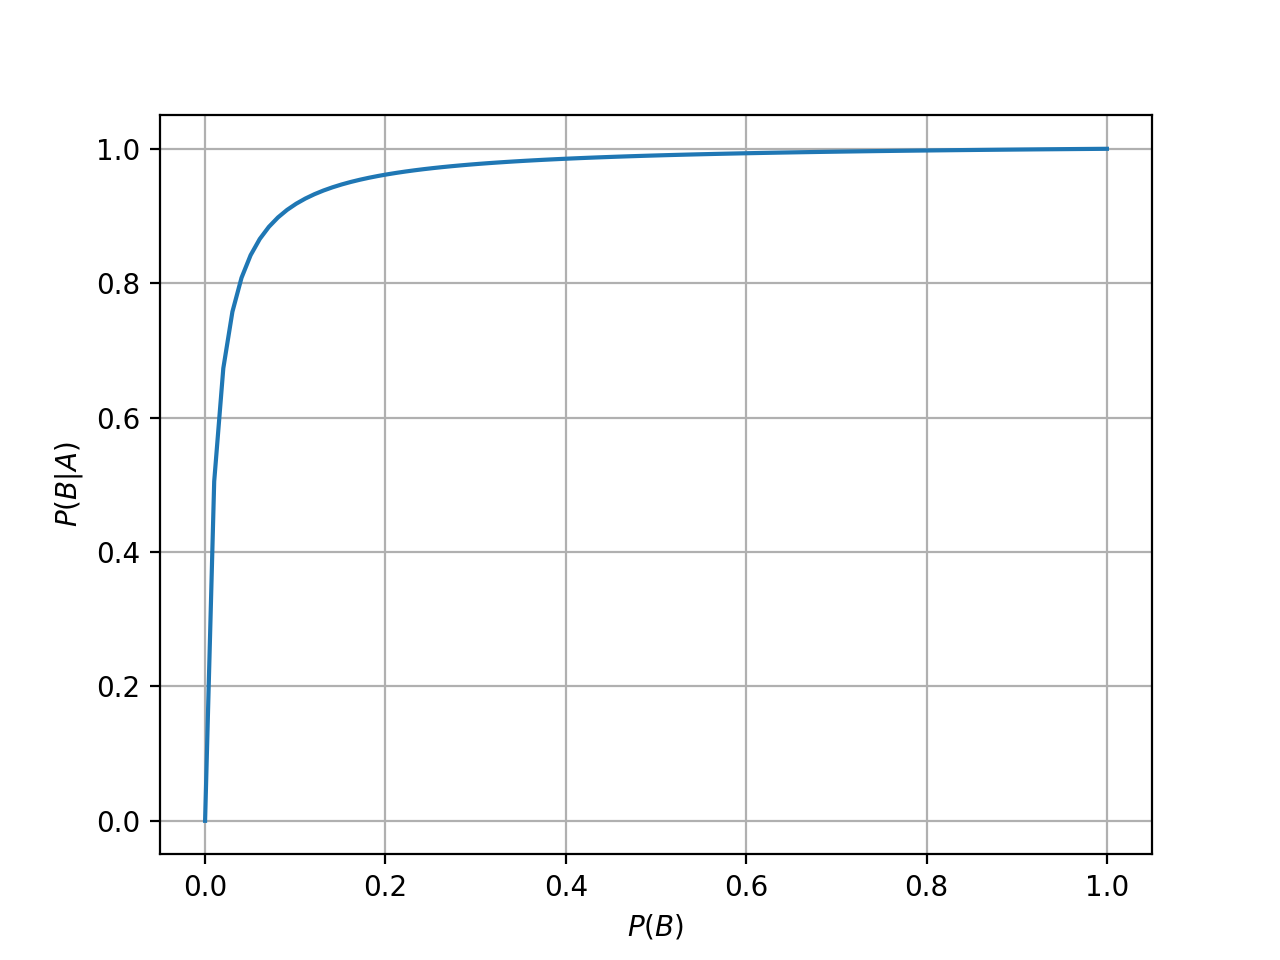

In [6]:
prob_b_a = lambda x: x / (0.99 * x + 0.01)
prob_b = np.linspace(0, 1, 100)
plt.plot(prob_b, prob_b_a(prob_b))
plt.xlabel('$P(B)$')
plt.ylabel('$P(B|A)$')
plt.grid()

График подсказывает нам, что улика в виде редкой крови и правда очень серьезная, ведь даже при малых априорных вероятностных предположениях о виновности человека значение $P(B|A)$ близко к единице. (даже если подкидываем монетку и P(B) = 0.5, то искомая величина равна 0.99).Тем не менее, если у нас есть какие-то весомые доказательства в пользу защиты, значение $P(B|A)$ может и приблизиться к 0, но такие доказательства должны быть очень весомые. Думаю, что тут нужно использовать исторические данные по подобным случаям и другие факторы, ведь в случае, например, с населением в 100 человек, задача тривиальна, а вот если речь идет о миллиардах - мы можем сильно промахнуться, используя только данные о группе крови.

P.S. Наверно, исходные события, которые я обозначил скорее являются чем-то вроде функций от человека x. Так что, может я и упускаю что-то, все же подсудимый, который взят в задаче это конкретный человек. Или это уже overthinking...

2. Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

**Решение:** Адвокат говорит о вероятности виновности случайно взятого жителя города c редкой группой. Вообще говоря, это $P(B)$, т.е. априорная вероятность, о которой шла речь ранее, когда мы подозреваем ВСЕХ жителей с редкой кровью равновероятно. Но мы не можем забыть про группу, так как, исходя из графика выше, она является весомым аргументом, но все это работает лишь в контексте наличия каких-то других доказательств, улик и т.д. Короче говоря, если подозреваемый взять не просто так, и априорная вероятность для него выше, чем 0.01, то сказанное адвокатом не работает.

P.S. Возможно, следует речь вести о P(B|A,C), где С, по сути- некоторые иные улики, свидетельствующие о виновности подсудимого. 

3. Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


**Решение:**

Введем бинарные переменные $c$ и $t$, отвечающие за наличие болезни и результат теста, соответственно. Тогда получим, что:

$$P(c=1|t=1) = \frac{P(c = 1) P(t=1|c=1)}{P(t=1)} = 
\frac{P(c = 1) P(t=1|c=1)}{P(t=1|c=0)P(c=0) + P(t=1|c=1)P(c=1)}
$$

$$P(c=1|t=0) = \frac{P(c = 1) P(t=0|c=1)}{P(t=0)} = 
\frac{P(c = 1) P(t=0|c=1)}{P(t=0|c=0)P(c=0) + P(t=0|c=1)P(c=1)}
$$

In [15]:
def get_proba(fp = 0.05, fn = 0.05,test_positive = True):
    if test_positive:
        return (0.01 * (1 - fn))/(0.01 * (1 - fn) + 0.99 * fp)
    else:
        return (0.01 * fn)/(0.01 * fn + 0.99 * (1 - fp))

In [17]:
get_proba()# Тест на совпадение со значением из лекции

0.16101694915254236

In [53]:
rates = np.linspace(0, 0.05, 100)
y_lim_positive_test = (0, 1.1)
y_lim_negative_test = (-0.001, 0.002)

Text(0, 0.5, '$P(c = 1|t = 0)$')

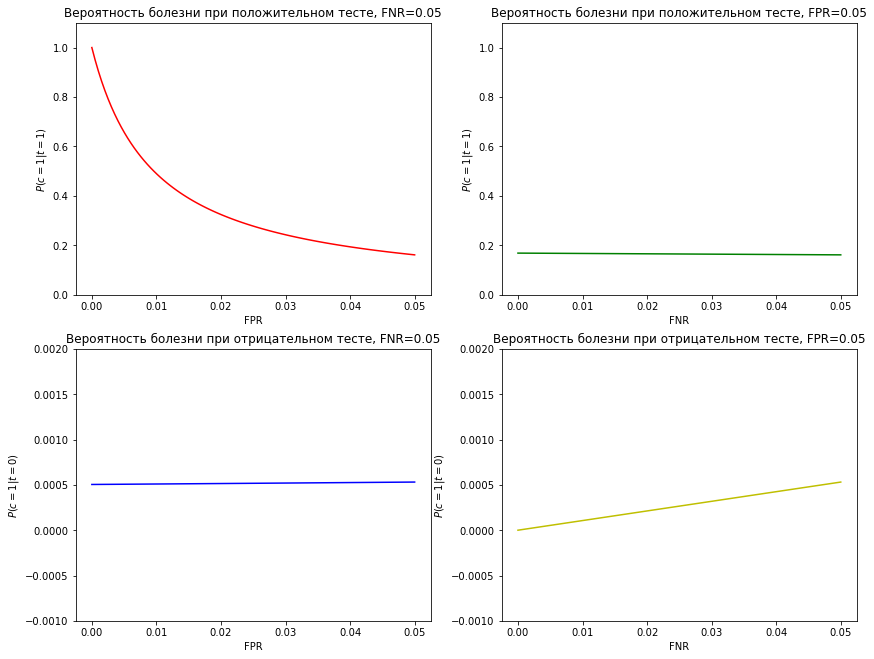

In [61]:
%matplotlib inline
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(14,11))
ax1.plot(rates, get_proba(fp=rates, test_positive=True),c='r')
ax1.set_ylim(y_lim_positive_test)        
ax1.set_title('Вероятность болезни при положительном тесте, FNR=0.05')
ax1.set_xlabel('FPR')
ax1.set_ylabel('$P(c=1|t=1)$')
ax2.plot(rates, get_proba(fn=rates, test_positive=True),c='g')
ax2.set_ylim(y_lim_positive_test)                                             
ax2.set_title('Вероятность болезни при положительном тесте, FPR=0.05')
ax2.set_xlabel('FNR')
ax2.set_ylabel('$P(c=1|t=1)$')
ax3.plot(rates, get_proba(fp=rates, test_positive=False),c='b')
ax3.set_ylim(y_lim_negative_test)
ax3.set_title('Вероятность болезни при отрицательном тесте, FNR=0.05')
ax3.set_xlabel('FPR')
ax3.set_ylabel('$P(c = 1|t = 0)$')
ax4.plot(rates, get_proba(fn=rates, test_positive=False),c='y')
ax4.set_ylim(y_lim_negative_test)
ax4.set_title('Вероятность болезни при отрицательном тесте, FPR=0.05')
ax4.set_xlabel('FNR')
ax4.set_ylabel('$P(c = 1|t = 0)$')

Естественно, все зависит от целей врачей и не только врачей.
Уменьшение FN поможет быть более уверенными, что если тест отрицательный, то тестируемый действительно здоров, но  не увеличит уверенность в наличии болезни у человека с положительным результатом, 
FP, напротив, поможет быть более уверенными, что если тест положительный, то тестируемый действительно болен, 
но почти не увеличит уверенность в том, что он здоров, если тест отрицательный.
Попробуем посчитать результат снижения обеих величин на одинаковую величину. 

In [77]:
N = 10000
for delta in [0.005,0.01,0.02, 0.03]:
    print('Результат изменения FP - ',(get_proba(fp=(0.05 - delta)) - get_proba())*N,' при изменении на ',delta)
    print('Результат изменения FN - ',(get_proba(test_positive=False) - get_proba(fn=(0.05 - delta), test_positive=False))*N,' при изменении на ',delta)

Результат изменения FP -  147.4623308612552  при изменении на  0.005
Результат изменения FN -  0.5310955153684812  при изменении на  0.005
Результат изменения FP -  324.657392384963  при изменении на  0.01
Результат изменения FN -  1.0622474762163303  при изменении на  0.01
Результат изменения FP -  813.2998962296783  при изменении на  0.02
Результат изменения FN -  2.1247207703485222  при изменении на  0.02
Результат изменения FP -  1632.1513275872037  при изменении на  0.03
Результат изменения FN -  3.1874199544124955  при изменении на  0.03


Можно заметить, что улучшая FP на столько же, на сколько и FN, мы получаем "больший выигрыш в людях". Причем, что важно, значительный и нелинейный. Да, мы таким образом не "заметим" несколько больных людей, однако, мы сильно освободим количество мест для потенциально больных людей, снизим загруженность персонала и сохраним ценные ресурсы. Ценой чьих-то жизней? Да, возможно, но, смертность, вроде как, от данной болезни не столь высока, чтобы не идти на такие жертвы. Мы, все же, не сразу "убиваем" пропущенных пациентов. Но, есть еще момент, который заключается в том, что мы сравниваем снижение НА какую-то величину. Возможно, затраты на снижение rate'ов на равные величины разнятся. Так что, есть еще много "но".. Однако, в упрощенном контексте, думаю, что лучше сосредоточиться на снижении FNR.